In [4]:
from __future__ import print_function

import numpy as np
import tensorflow as tf
from IPython.display import Image, display_html
import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.render as render
import lucid.optvis.param as param
import lucid.optvis.transform as transform

In [5]:
model = models.InceptionV1()
model.load_graphdef()

512 1151.7833



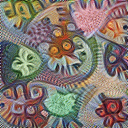

In [6]:
_ = render.render_vis(model, 'mixed4a_pre_relu:476')

512 1729.5433



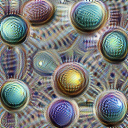

In [7]:
obj = objectives.channel('mixed4a_pre_relu', 465)
_ = render.render_vis(model, obj)

512 2065.909



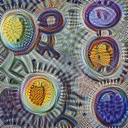

In [8]:
channel = lambda n: objectives.channel('mixed4a_pre_relu', n)
obj = channel(476) + channel(465)
_ = render.render_vis(model, obj)

512 2348.1704



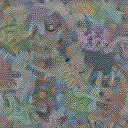

In [9]:
# No transformation robustness

transforms = []
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

512 1892.6741



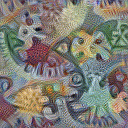

In [10]:
transforms = [
    transform.jitter(2)
]
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

In [11]:
# Breaking out all the stops

transforms = [
    transform.pad(16),
    transform.jitter(8),
    transform.random_scale([n/100. for n in range(80, 120)]),
    transform.random_rotate(range(-10,10) + range(-5,5) + 10*range(-2,2)),
    transform.jitter(2)
]
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

TypeError: unsupported operand type(s) for +: 'range' and 'range'

In [ ]:
# Using alternate parameterizations is one of the primary ingredients for
# effective visualization

param_f = lambda: param.image(128, fft=False, decorrelate=False)
_ = render.render_vis(model, "mixed4a_pre_relu:2", param_f)

In [ ]:
# Using alternate parameterizations is one of the primary ingredients for
# effective visualization

param_f = lambda: param.image(128, fft=True, decorrelate=True)
_ = render.render_vis(model, "mixed4a_pre_relu:2", param_f)